In [82]:
#Load the dataset
import pandas as pd
import numpy as np
df = pd.read_csv('/content/uber.csv')


In [83]:
print(df.shape)


(200000, 9)


In [84]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [85]:
df.drop(['Unnamed: 0','key'], axis=1, inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


The dataset contains 200000 entries with information about Uber rides, including fare amount, pickup and dropoff locations, pickup time, and passenger count. Key columns are fare amount (target variable), pickup datetime, and geographical coordinates.


In [87]:
#Checking the null elements
print(df.isnull().sum())

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


There is one row in your dataset where both dropoff_longitude and dropoff_latitude are missing.

In [88]:
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace=True)


In [89]:
# Check again for missing values
print(df.isnull().sum())

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [90]:
#Statisitics of our data
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


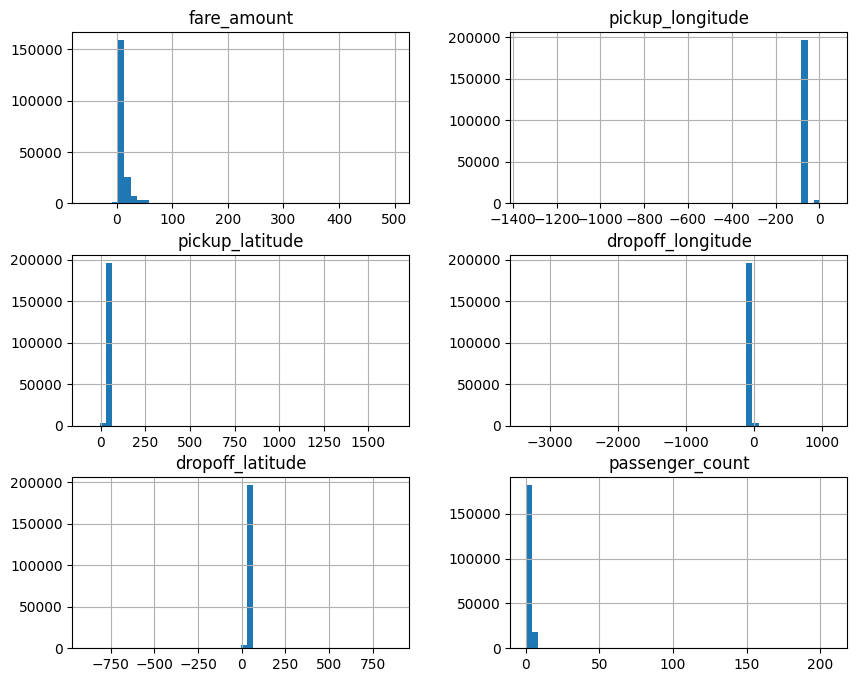

In [91]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.hist(bins=50, figsize=(10, 8))
plt.show()

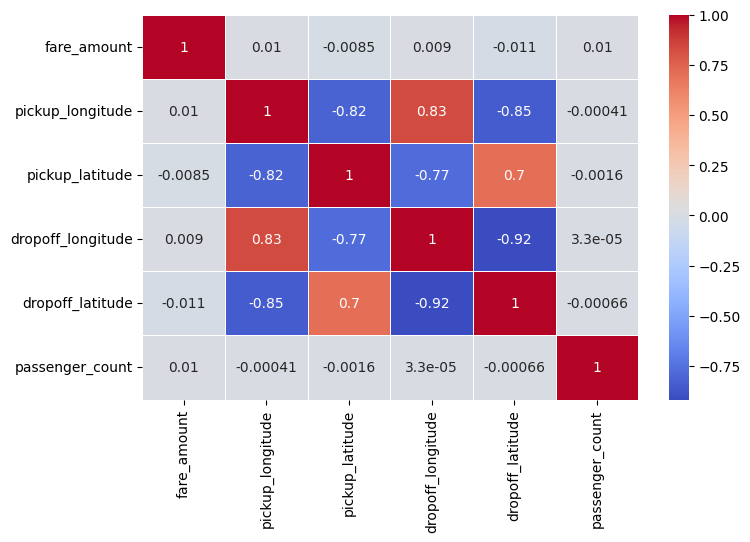

In [92]:
#correlation matrix
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix using only the numeric data
corr_matrix = numeric_data.corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

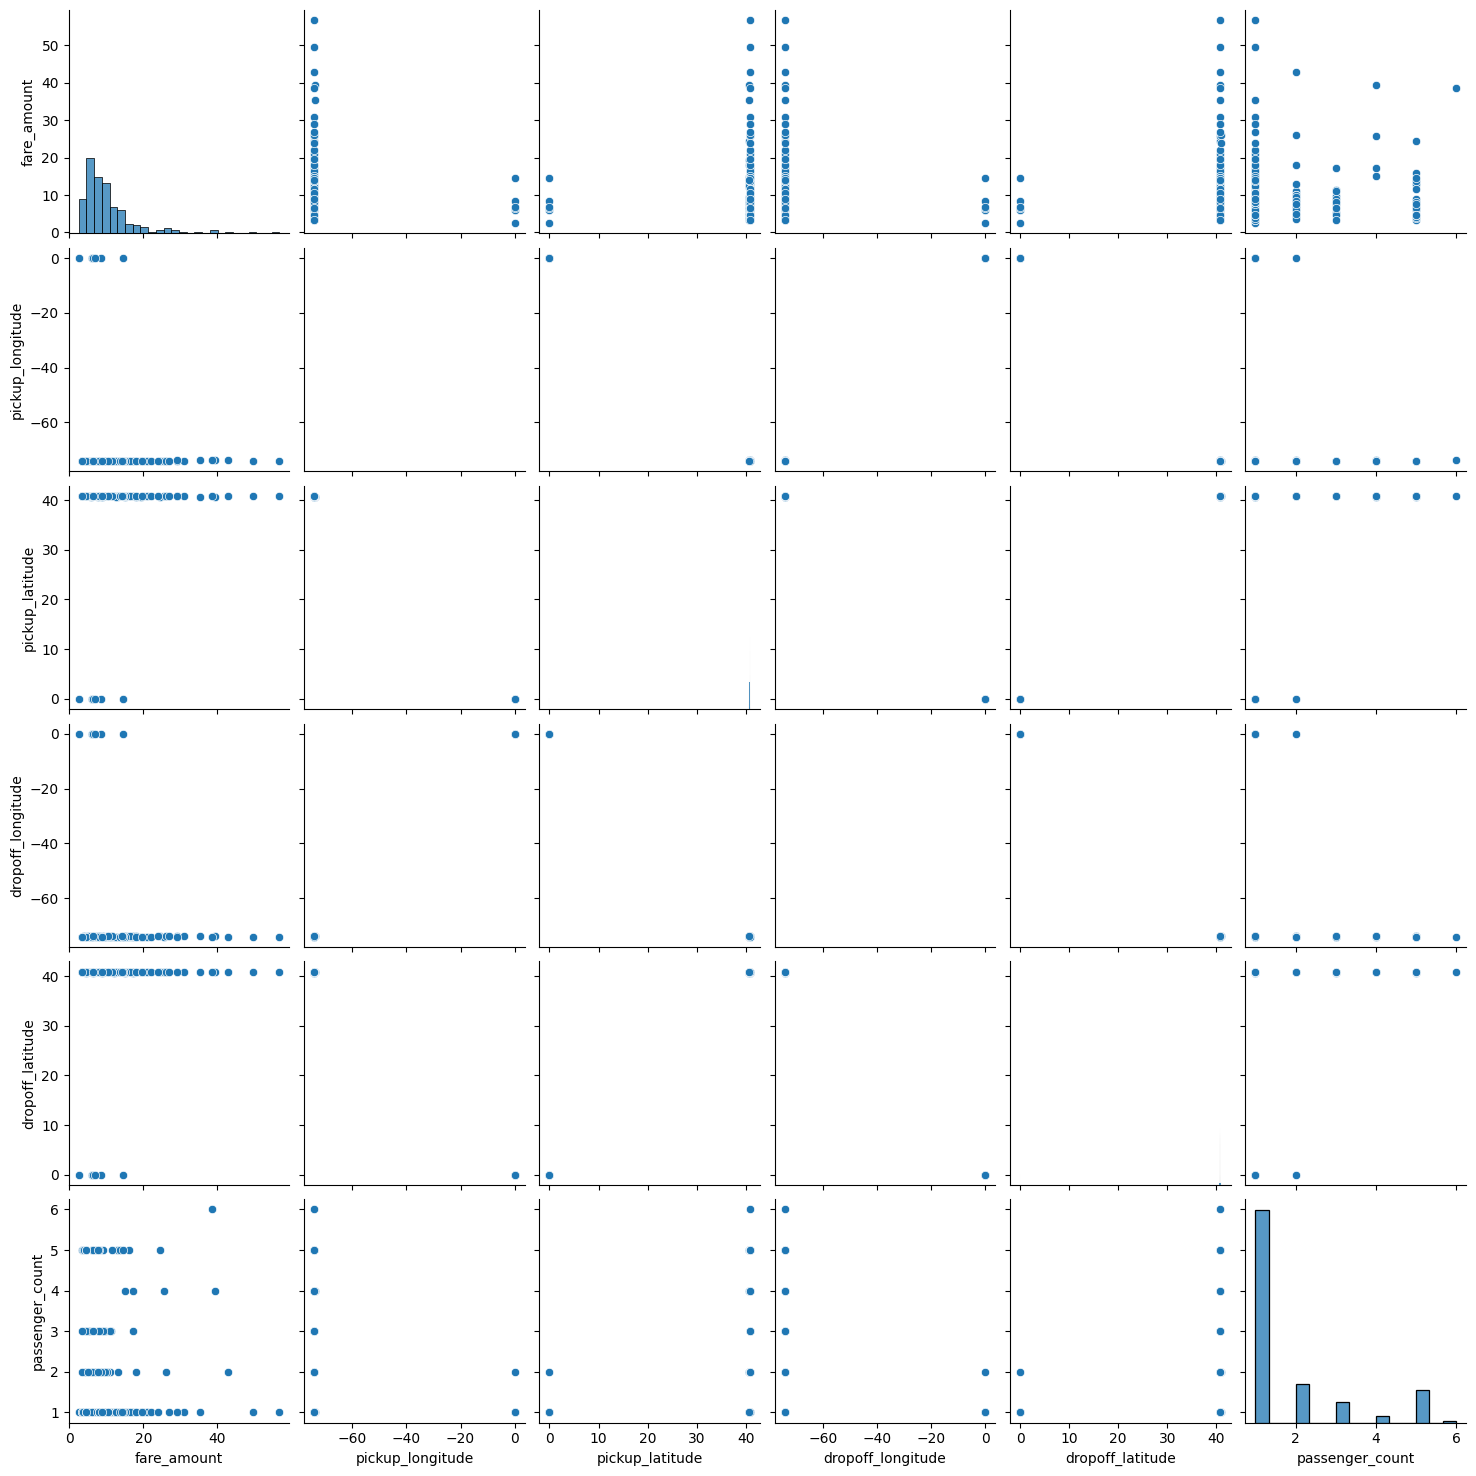

In [93]:
#pairplot analysis
df_subset = df.head(200)
sns.pairplot(df_subset)
plt.show()

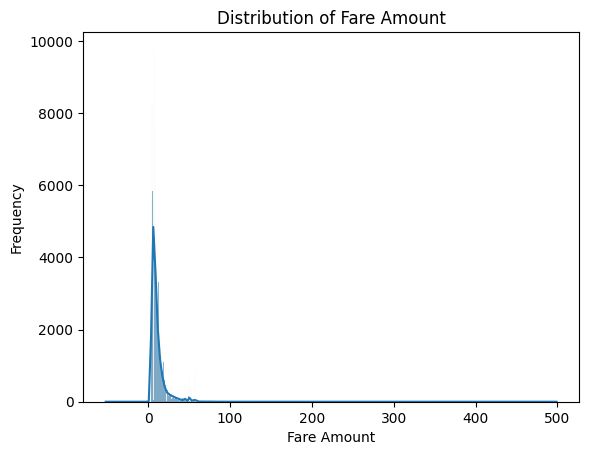

In [94]:
#Histogragm plot for fare amount
sns.histplot(df['fare_amount'], kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

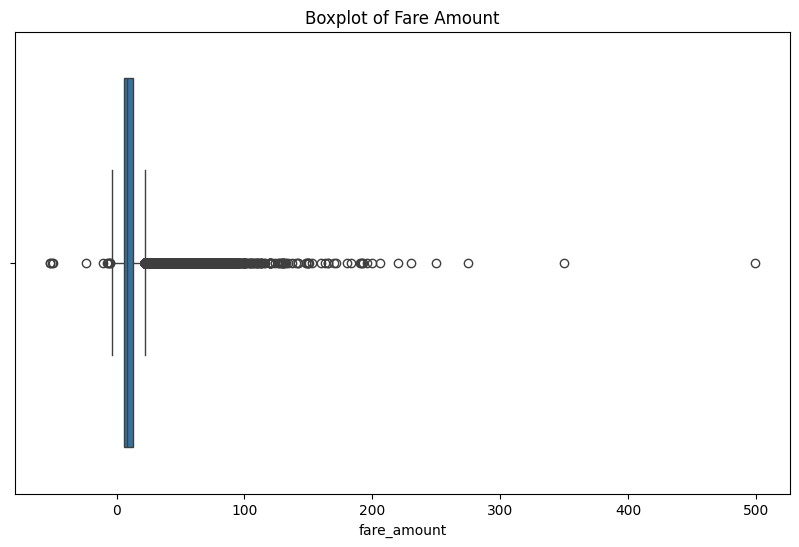

In [95]:
#Boxpolt for fare amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='fare_amount', data=df)
plt.title('Boxplot of Fare Amount')
plt.show()

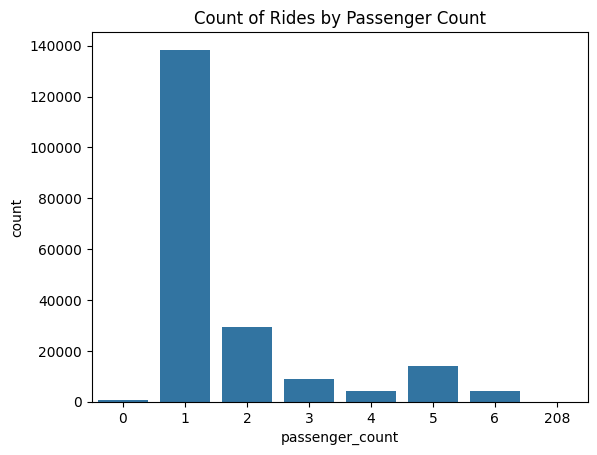

In [96]:
#ploting histogram for passenger count
sns.countplot(x='passenger_count', data=df)
plt.title('Count of Rides by Passenger Count')
plt.show()


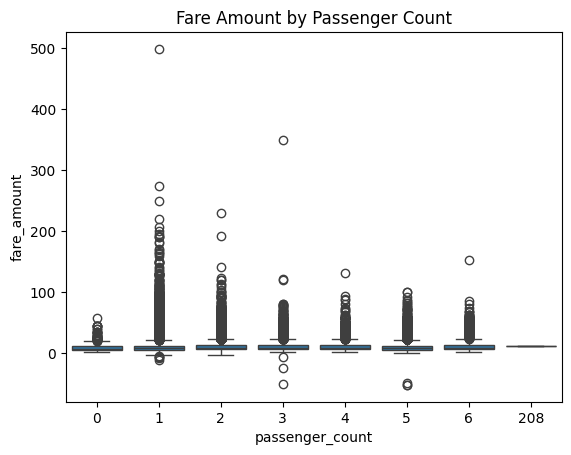

In [97]:
#box plot for passenger count
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount by Passenger Count')
plt.show()

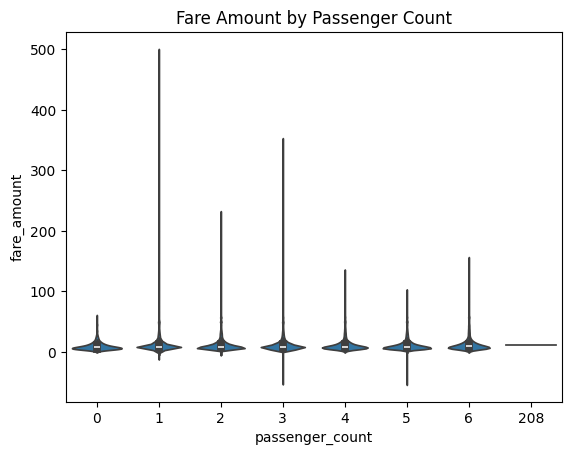

In [98]:
#violin plot
sns.violinplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount by Passenger Count')
plt.show()

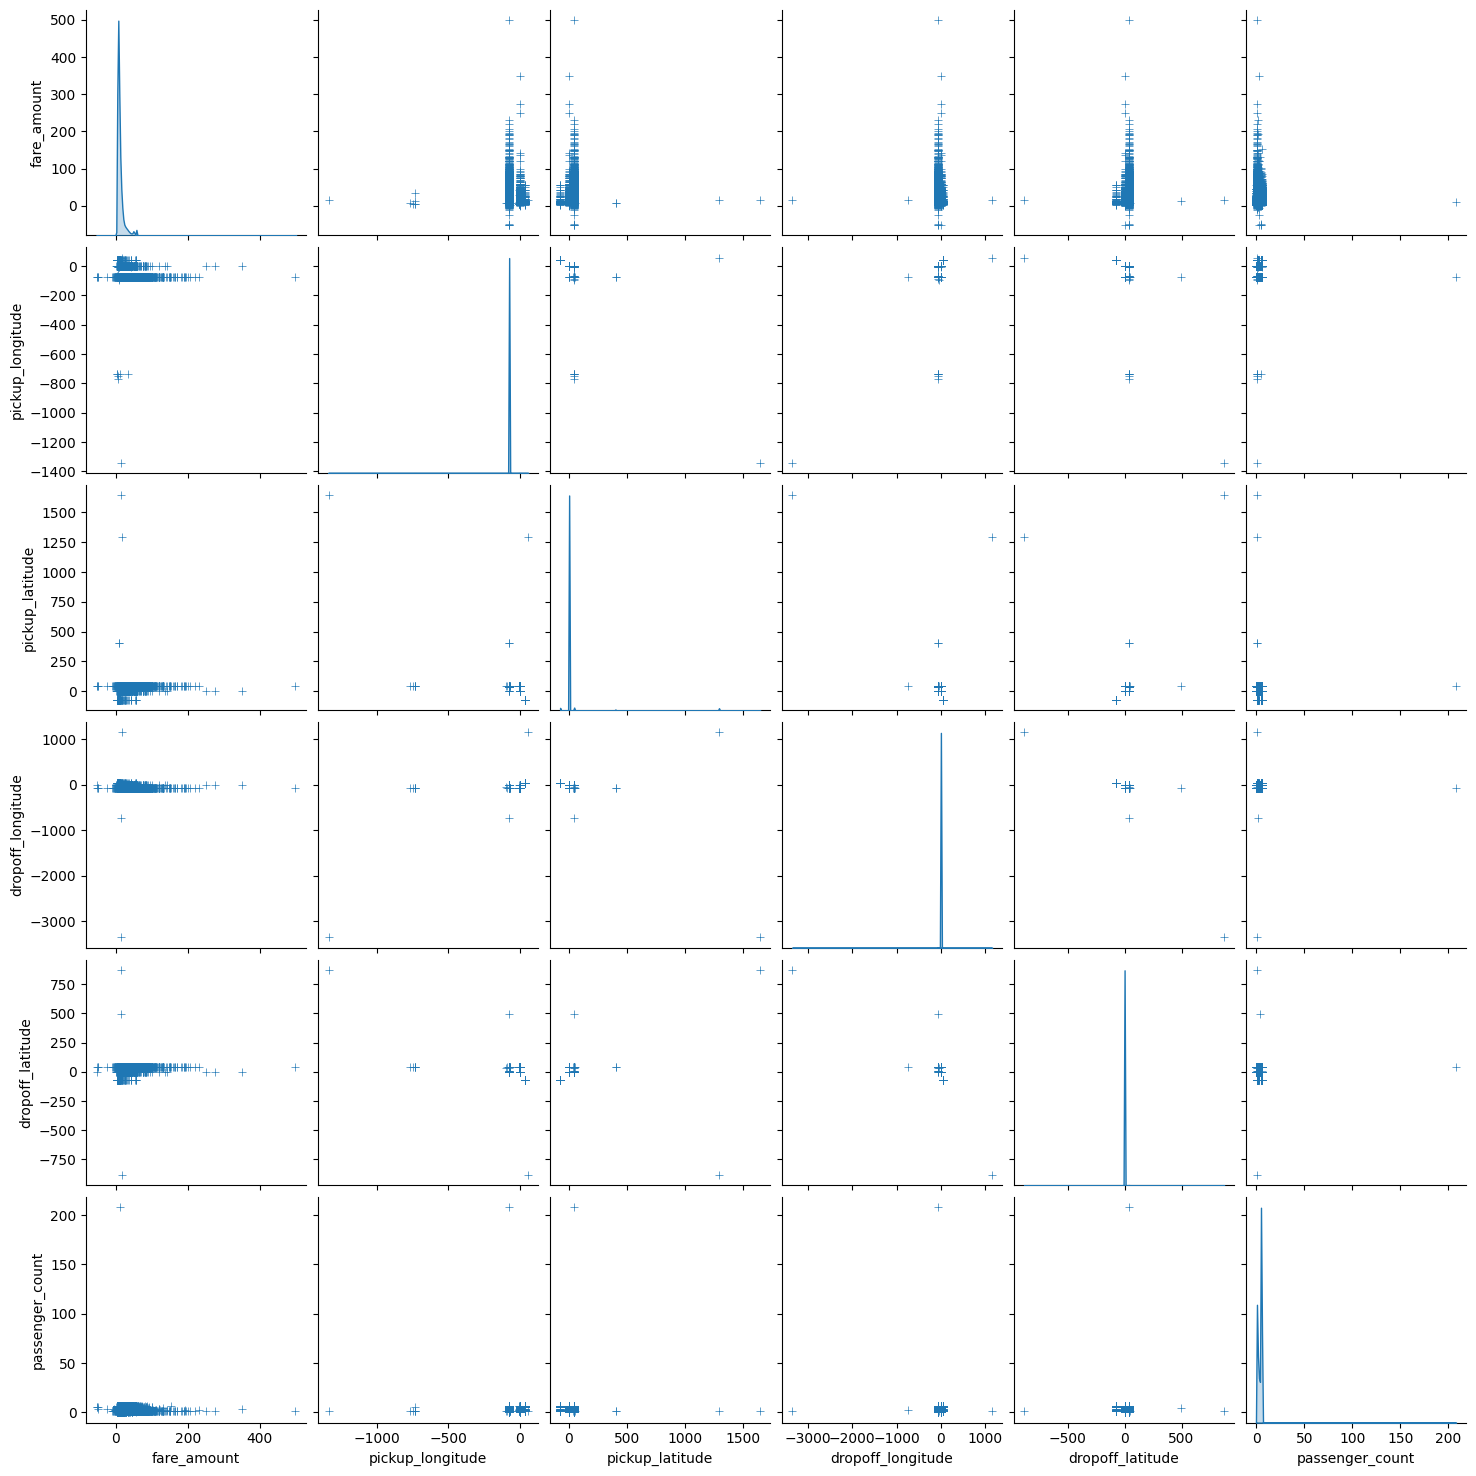

In [99]:
#showing relationships between variables
sns.pairplot(df, diag_kind='kde', markers="+")
plt.show()

<ipython-input-100-75fa60bd4927>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'])


<Axes: xlabel='fare_amount', ylabel='Density'>

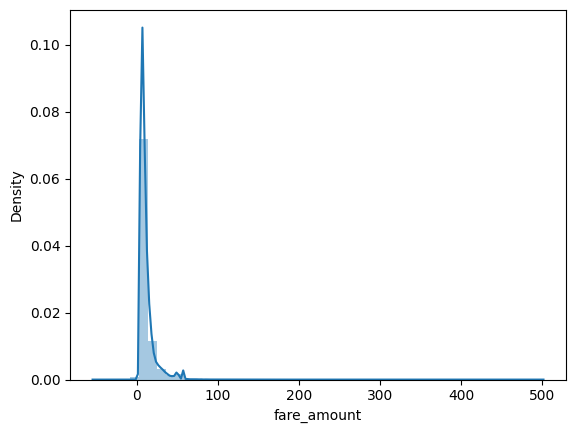

In [100]:
#distribution plot of the fare_amount
sns.distplot(df['fare_amount'])

<ipython-input-101-7bca26429313>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pickup_latitude'])


<Axes: xlabel='pickup_latitude', ylabel='Density'>

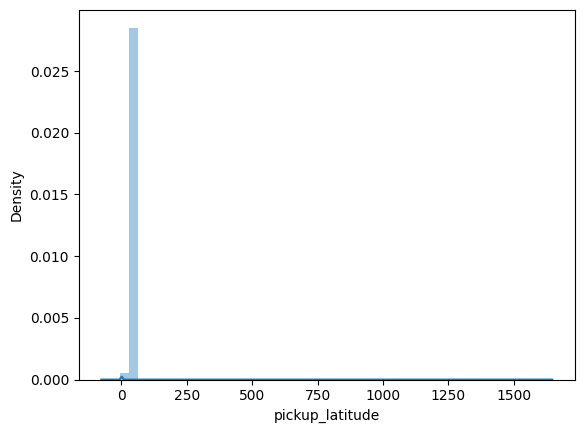

In [101]:
#distribution plot of the pick up latitude
sns.distplot(df['pickup_latitude'])

<ipython-input-102-71cac32aae7c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pickup_longitude'])


<Axes: xlabel='pickup_longitude', ylabel='Density'>

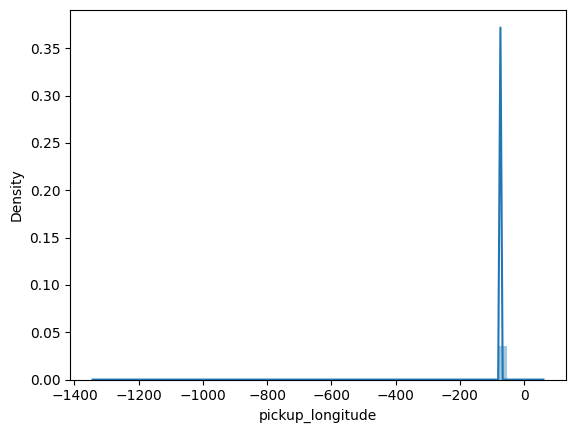

In [102]:
#distribution plot of the pick up longitude
sns.distplot(df['pickup_longitude'])

<ipython-input-103-b2f0f7a4a1a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dropoff_longitude'])


<Axes: xlabel='dropoff_longitude', ylabel='Density'>

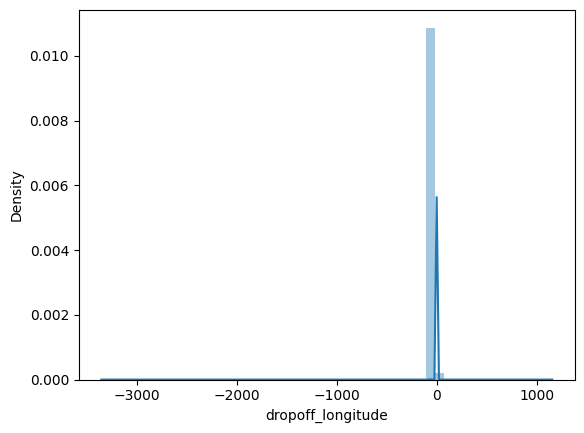

In [103]:
#distribution plot of the drop off longitude
sns.distplot(df['dropoff_longitude'])

<ipython-input-104-c348ff5cc449>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dropoff_latitude'])


<Axes: xlabel='dropoff_latitude', ylabel='Density'>

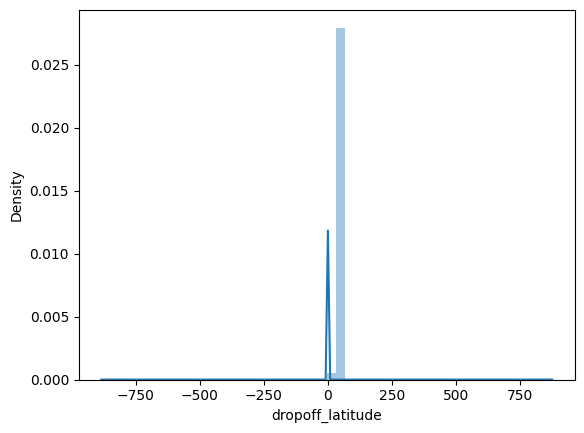

In [104]:
#distribution plot of the drop off latitude
sns.distplot(df['dropoff_latitude'])

In [105]:
#print max and min values of latitude and longitude in the dataset

print("drop_off latitude min value",df["dropoff_latitude"].min())
print("drop_off latitude max value",df["dropoff_latitude"].max())
print("drop_off longitude min value", df["dropoff_longitude"].min())
print("drop_off longitude max value",df["dropoff_longitude"].max())
print("pickup latitude min value",df["pickup_latitude"].min())
print("pickup latitude max value",df["pickup_latitude"].max())
print("pickup longitude min value",df["pickup_longitude"].min())
print("pickup longitude max value",df["pickup_longitude"].max())

drop_off latitude min value -881.9855130000001
drop_off latitude max value 872.6976279999999
drop_off longitude min value -3356.6663
drop_off longitude max value 1153.5726029999998
pickup latitude min value -74.01551500000001
pickup latitude max value 1644.421482
pickup longitude min value -1340.64841
pickup longitude max value 57.418457


In [106]:
#define a rectangular region with specific bounds for longitude and latitude

min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532,
max_latitude=41.709555

In [107]:
tempdf=df[(df["dropoff_latitude"]<min_latitude) | (df["pickup_latitude"]<min_latitude) | (df["dropoff_longitude"]<min_longitude) | (df["pickup_longitude"]<min_longitude) | (df["dropoff_latitude"]>max_latitude) | (df["pickup_latitude"]>max_latitude) | (df["dropoff_longitude"]>max_longitude) | (df["pickup_longitude"]>max_longitude) ]
print("before droping",df.shape)
df.drop(tempdf.index,inplace=True)
print("after droping",df.shape)

before droping (200000, 7)
after droping (195732, 7)


In [108]:
print("before droping", df.shape)
df=df[df['fare_amount']>0]
print("after droping", df.shape)

before droping (195732, 7)
after droping (195713, 7)


In [109]:
# Reframing the columns

import datetime as dt
import geopy.distance

df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

df['Distance']=[round(geopy.distance.distance((df.pickup_latitude[i], df.pickup_longitude[i]),(df.dropoff_latitude[i], df.dropoff_longitude[i])).m,2) for i in df.index]
df.drop(['pickup_datetime',], axis=1, inplace=True)
original_df = df.copy(deep=True)

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4483.73


In [110]:
#checking datatype of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195713 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        195713 non-null  float64
 1   pickup_longitude   195713 non-null  float64
 2   pickup_latitude    195713 non-null  float64
 3   dropoff_longitude  195713 non-null  float64
 4   dropoff_latitude   195713 non-null  float64
 5   passenger_count    195713 non-null  int64  
 6   year               195713 non-null  int32  
 7   month              195713 non-null  int32  
 8   weekday            195713 non-null  int32  
 9   hour               195713 non-null  int32  
 10  Distance           195713 non-null  float64
dtypes: float64(6), int32(4), int64(1)
memory usage: 19.0 MB


##**Training the Models**

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x=df.drop("fare_amount", axis=1)

In [113]:
y=df['fare_amount']

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [115]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,Distance
146754,-73.974263,40.783887,-73.990715,40.731491,1,2013,12,2,23,5982.09
69173,-73.996877,40.725722,-74.006947,40.727873,2,2010,6,0,15,883.63
46691,-74.003805,40.737978,-73.970522,40.687765,1,2011,6,2,20,6245.17
68739,-73.970110,40.756680,-73.987190,40.744650,1,2014,4,1,20,1966.03
109240,-73.985637,40.727023,-73.983647,40.734324,1,2009,9,2,21,828.01


In [116]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,Distance
47312,-73.951993,40.781775,-73.937771,40.843928,1,2014,9,3,0,7005.64
80549,-73.984573,40.779665,-73.959725,40.779520,1,2013,9,2,8,2097.60
137366,-74.004590,40.751900,-73.991900,40.759910,1,2014,8,0,19,1392.68
70622,-73.974227,40.746112,-73.788993,40.654638,1,2009,9,3,13,18661.88
19434,-73.986498,40.764518,-73.988488,40.752885,1,2011,11,2,9,1302.72


In [117]:
x_train.shape

(156570, 10)

In [118]:
x_test.shape

(39143, 10)

##**LINEAR REGRESSION**

In [119]:
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [120]:
predictedvalues = lrmodel.predict(x_test)

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Calculate Root Mean Squared Error (RMSE)
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictedvalues)
print("Mean Absolute Error (MAE) for Linear Regression is", mae)

# Calculate R² Score
r2 = r2_score(y_test, predictedvalues)
print("R² Score for Linear Regression is", r2)

RMSE value for Linear regression is 4.99367031648542
Mean Absolute Error (MAE) for Linear Regression is 2.3725062632178444
R² Score for Linear Regression is 0.7266091575110876


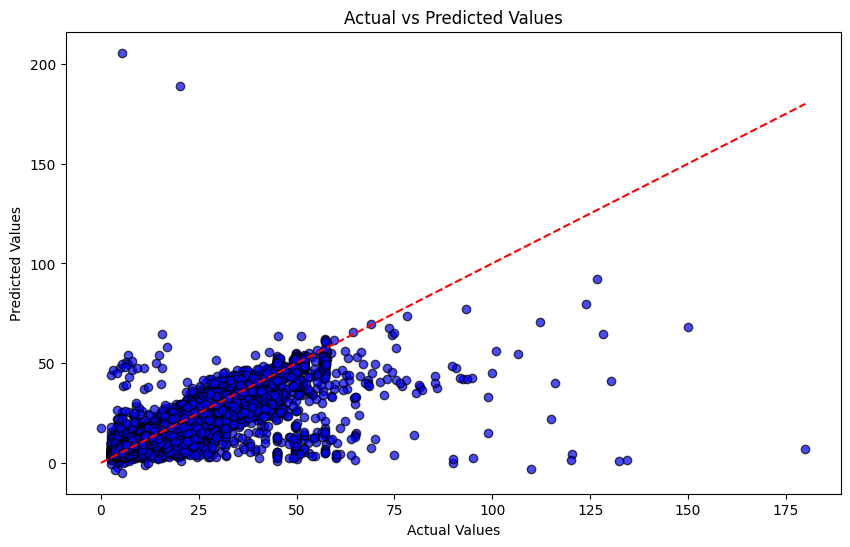

In [122]:
#plot actual and predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictedvalues, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

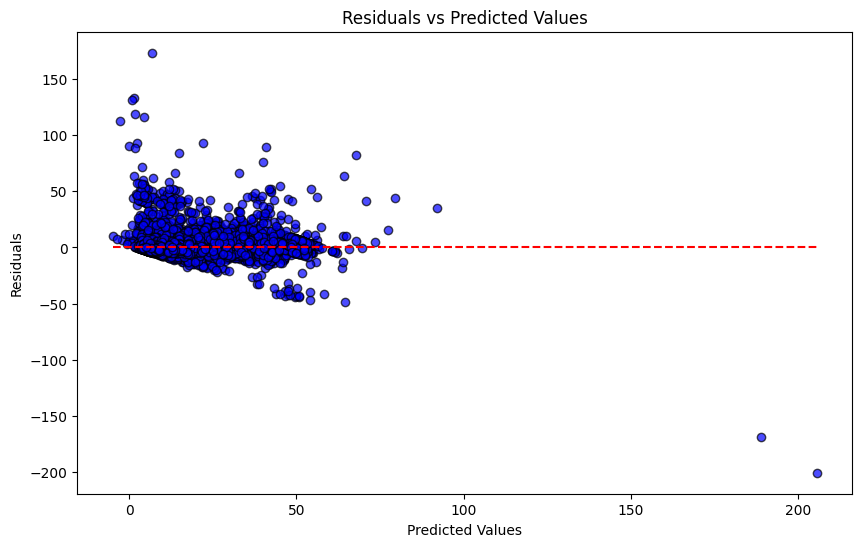

In [123]:
#plot residual vs predicted values
residuals = y_test - predictedvalues

plt.figure(figsize=(10, 6))
plt.scatter(predictedvalues, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.hlines(0, min(predictedvalues), max(predictedvalues), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

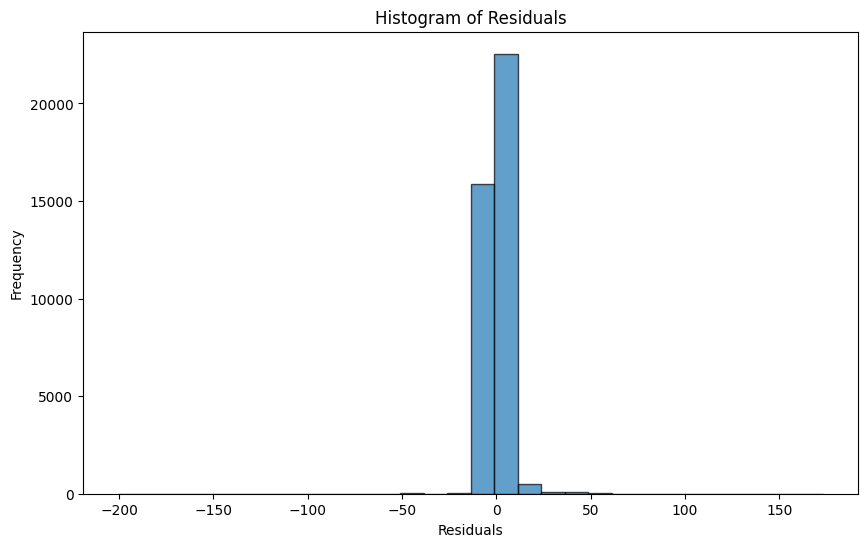

In [124]:
#plot Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

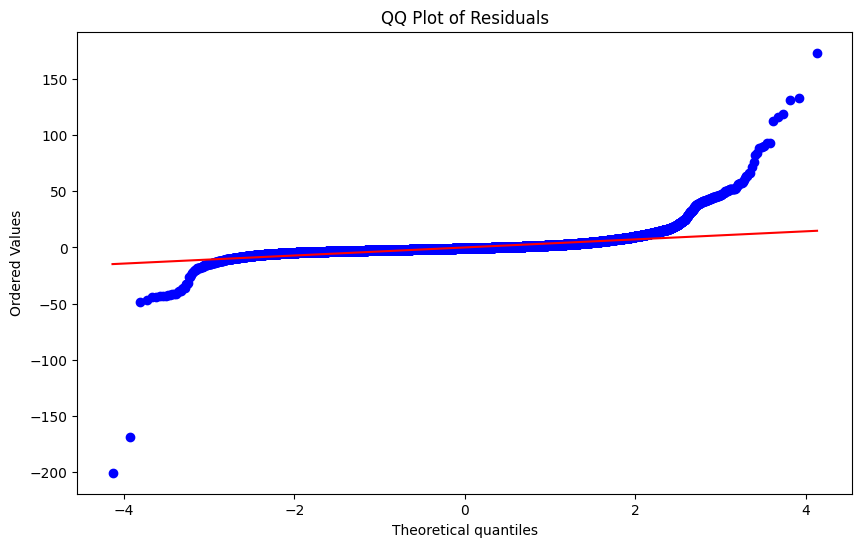

In [125]:
#QQ plot of residuals
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

##**RANDOM FOREST**

In [126]:
from sklearn.ensemble import RandomForestRegressor

# Splitting the data into features (X) and target (y)
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [128]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [129]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1.8085008864931147
Mean Squared Error (MSE): 14.696098154838639
Root Mean Squared Error (RMSE): 3.8335490286206904
R² Score: 0.8388811795175326


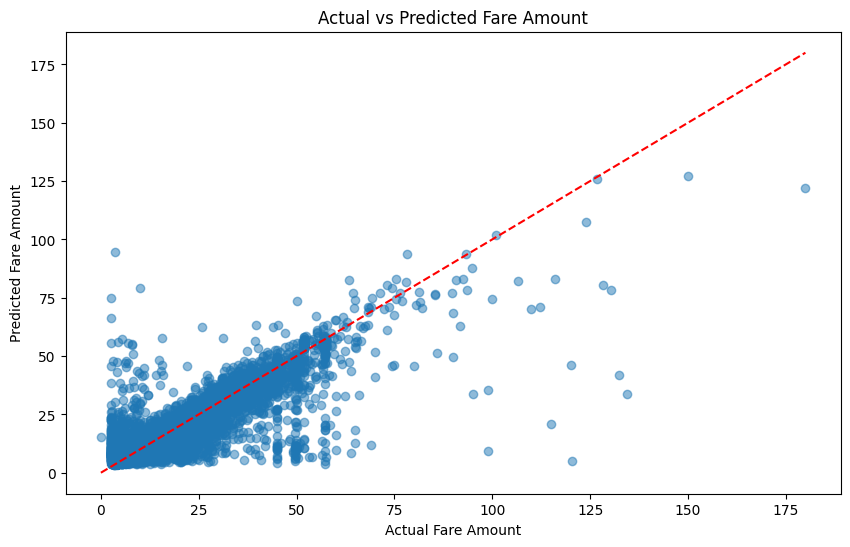

In [130]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

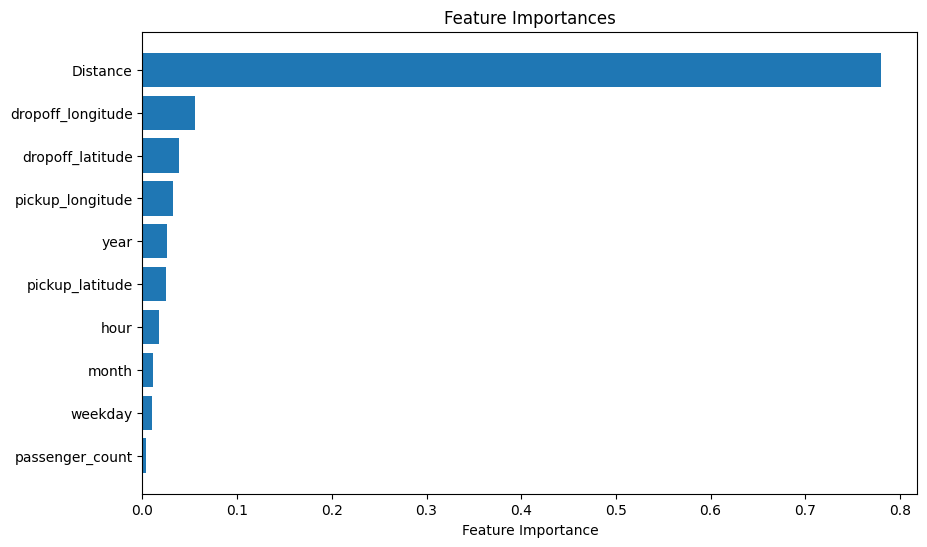

In [131]:
## Visualization of Feature Importances
importances = rf_model.feature_importances_
features = x_train.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.show()

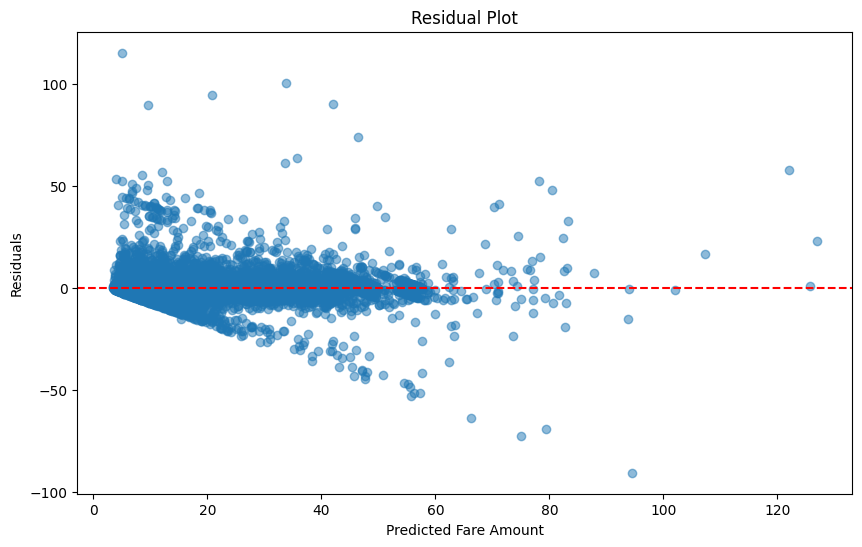

In [132]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Fare Amount')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

##**GRADIENT BOOSTING**

In [133]:
from sklearn.ensemble import GradientBoostingRegressor

# Splitting the data into features (X) and target (y)
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


# Train the model on the training data
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [134]:
# Make predictions on the test data
predicted_values = gb_model.predict(X_test)

In [135]:
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
mae = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)

# Print evaluation metrics
print("Root Mean Squared Error (RMSE) for Gradient Boosting Regression is", rmse)
print("Mean Absolute Error (MAE) for Gradient Boosting Regression is", mae)
print("R² Score for Gradient Boosting Regression is", r2)

Root Mean Squared Error (RMSE) for Gradient Boosting Regression is 3.931640796799504
Mean Absolute Error (MAE) for Gradient Boosting Regression is 1.9575308346460425
R² Score for Gradient Boosting Regression is 0.8305303643796346


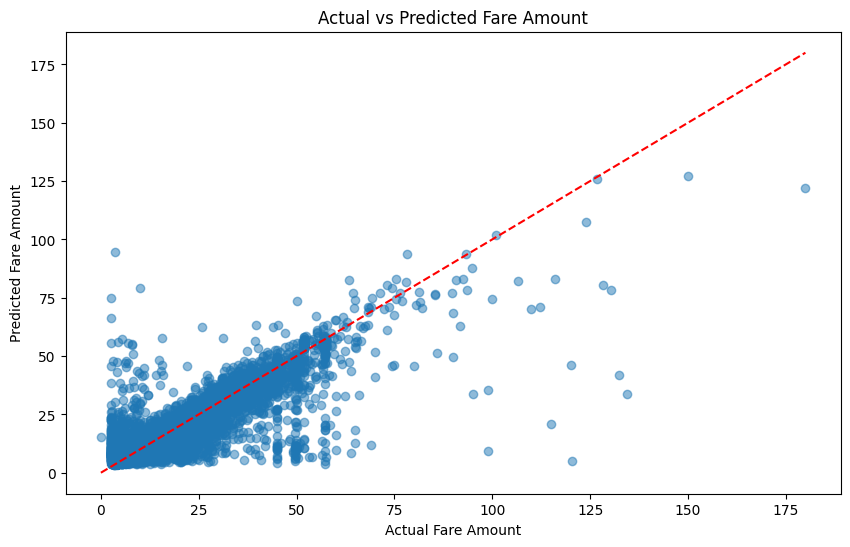

In [136]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

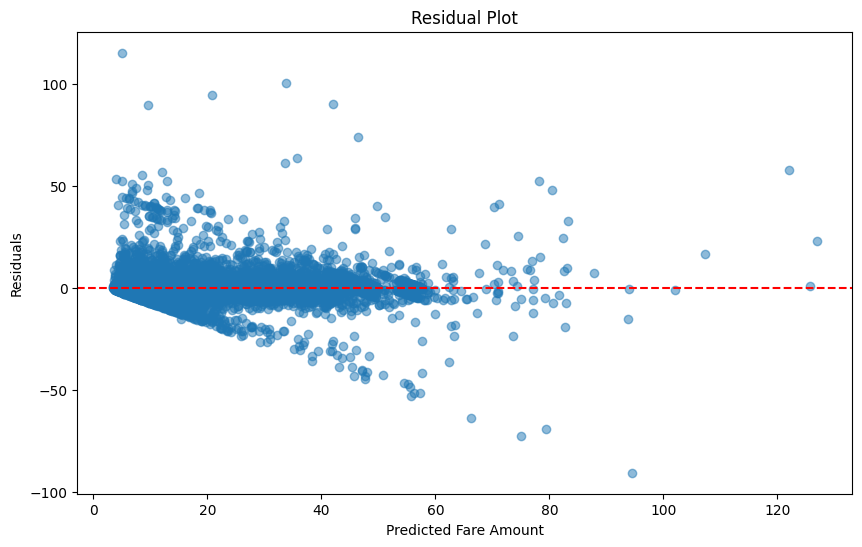

In [137]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Fare Amount')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

##**NEURAL NETWORK**

In [138]:
# Import necessary libraries
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [139]:
# Load the dataset
df = '/content/uber.csv'
data = pd.read_csv(df)

In [140]:
# Convert 'pickup_datetime' to datetime and extract features
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], errors='coerce')
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_month'] = data['pickup_datetime'].dt.month

# Drop rows with missing values in 'pickup_datetime' features
data = data.dropna(subset=['pickup_hour', 'pickup_day', 'pickup_month'])

# Drop non-numeric or irrelevant columns
data = data.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1, errors='ignore')

'''# Define a function to fetch weather data
def fetch_weather_data(city):
    api_key = 'a3729cac8a966c8062659ca4bb7af07a'
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric'
    response = requests.get(url)
    data = response.json()

    if data.get('cod') != 200:
        print(f"Error fetching data for {city}: {data.get('message')}")
        return None, None

    temperature = data['main']['temp']
    weather_description = data['weather'][0]['description']
    return temperature, weather_description

# Fetch and add weather data for the dataset
city = 'New York'
temperature, weather_description = fetch_weather_data(city)

# If weather data is not fetched, handle the situation
if temperature is None or weather_description is None:
    print("Weather data not fetched properly.")
    temperature = 0  # Default value
    weather_description = 'unknown'  # Default value

data['temperature'] = temperature
data['weather_description'] = weather_description

# Convert categorical data to numeric
data['weather_description'] = data['weather_description'].astype('category').cat.codes
'''
# Drop rows with any NaN values after conversion
data = data.dropna()

# Define features and target variable
X = data.drop('fare_amount', axis=1)
y = data['fare_amount']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define and train the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)



Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 112.6774 - val_loss: 145.1613
Epoch 2/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 97.7574 - val_loss: 101.1134
Epoch 3/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 96.3534 - val_loss: 93.8819
Epoch 4/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 96.7384 - val_loss: 94.1989
Epoch 5/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 97.7315 - val_loss: 95.0199
Epoch 6/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 98.1884 - val_loss: 93.4607
Epoch 7/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 94.8286 - val_loss: 93.1694
Epoch 8/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 98.8920 - val_loss: 92.9061
Epoch 9/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 95.6287 - val_loss: 91.0800
Epoch 10/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 93.5508 - val_loss: 86.9905
Epoch 11/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 83.4043 - val_loss: 81.0677
Epoch 12/25
4

In [141]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 5.2058315189721585
Mean Squared Error (MSE): 73.0159458673002
Root Mean Squared Error (RMSE): 8.544936855664892
R² Score: 0.29808513305676265


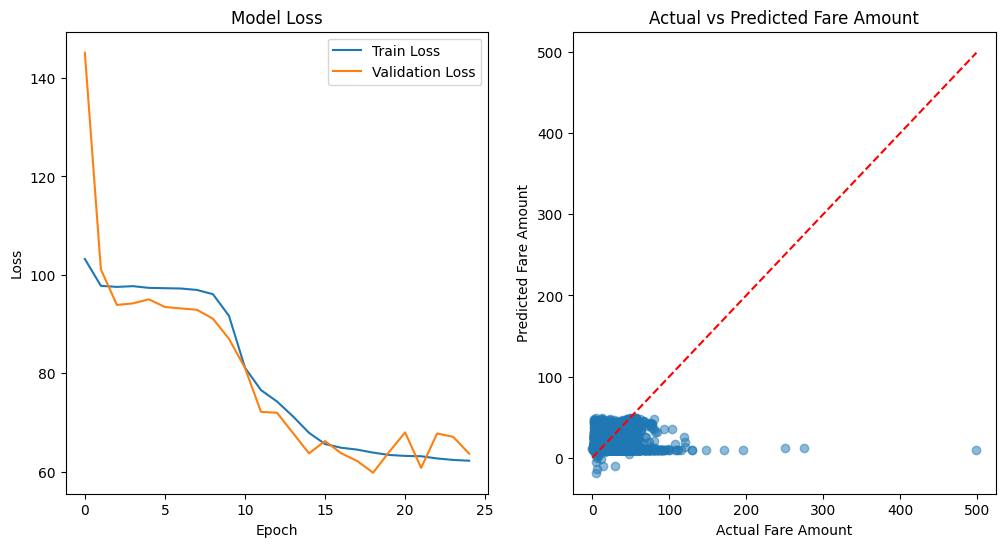

In [142]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualize predictions vs actual values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

##**XGBOOST REGRESSION**

In [143]:
# Train and evaluate XGBoost Regressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [144]:
# Make predictions on the test data
xgb_model_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics using correct predictions
rmse = np.sqrt(mean_squared_error(y_test, xgb_model_pred))
mae = mean_absolute_error(y_test, xgb_model_pred)
r2 = r2_score(y_test, xgb_model_pred)

# Print evaluation metrics
print("Root Mean Squared Error (RMSE) for XGBoost Regression is", rmse)
print("Mean Absolute Error (MAE) for XGBoost Regression is", mae)
print("R² Score for XGBoost Regression is", r2)

Root Mean Squared Error (RMSE) for XGBoost Regression is 5.9737920044200195
Mean Absolute Error (MAE) for XGBoost Regression is 3.036977494968414
R² Score for XGBoost Regression is 0.6569424986799182


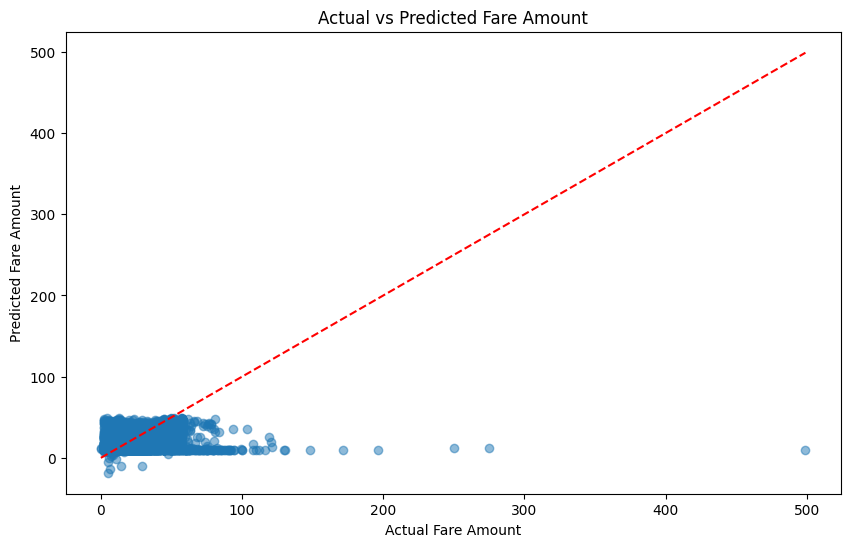

In [145]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

##**ENSEMBLE MODEL - RANDOM FOREST & GRADIENT BOOSTING**

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [147]:
#load data
data = pd.read_csv(df)

# Convert 'pickup_datetime' to datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], errors='coerce')

# Extract features from 'pickup_datetime'
data['day'] = data['pickup_datetime'].dt.day
data['hour'] = data['pickup_datetime'].dt.hour
data['weekday'] = data['pickup_datetime'].dt.weekday
data['month'] = data['pickup_datetime'].dt.month
data['year'] = data['pickup_datetime'].dt.year

# Drop unnecessary columns
data = data.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1)

# Handle missing values if any
data = data.dropna()

# Define features and target variable
X = data.drop('fare_amount', axis=1)
y = data['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [148]:
# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [149]:
# Make predictions
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

In [150]:
# Ensemble prediction by averaging
ensemble_pred = (rf_pred + gb_pred) / 2

In [151]:
# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
# Calculate Mean Absolute Error (MAE)
rf_mae = mean_absolute_error(y_test, rf_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
# Calculate R² Score
rf_r2 = r2_score(y_test, rf_pred)
gb_r2 = r2_score(y_test, gb_pred)
ensemble_r2 = r2_score(y_test, ensemble_pred)

In [152]:
# Print results
print("Random Forest:")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R² Score: {rf_r2}")
print()

print("Gradient Boosting:")
print(f"RMSE: {gb_rmse}")
print(f"MAE: {gb_mae}")
print(f"R² Score: {gb_r2}")
print()

print("Ensemble:")
print(f"RMSE: {ensemble_rmse}")
print(f"MAE: {ensemble_mae}")
print(f"R² Score: {ensemble_r2}")

Random Forest:
RMSE: 5.333599887906539
MAE: 2.0396462287499997
R² Score: 0.7265313217711722

Gradient Boosting:
RMSE: 5.825084196006097
MAE: 2.9768356349549054
R² Score: 0.6738096267748392

Ensemble:
RMSE: 5.379700007749576
MAE: 2.3363602703799415
R² Score: 0.7217835258591436


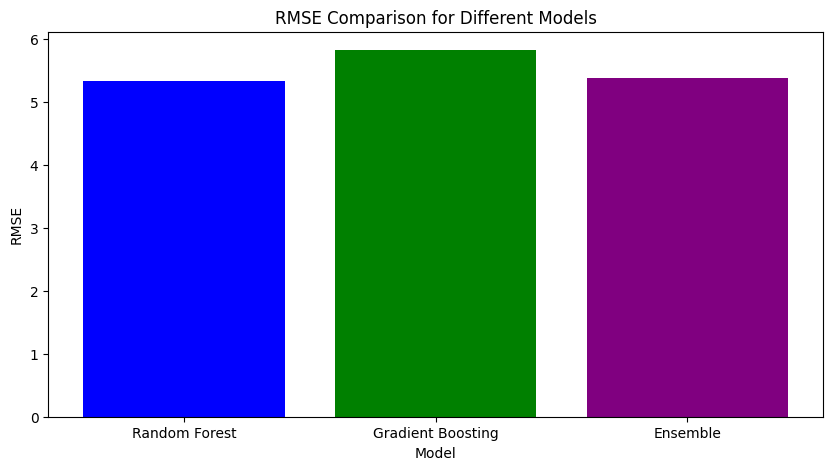

In [153]:
# Plotting the results
models = ['Random Forest', 'Gradient Boosting', 'Ensemble']
rmse_values = [rf_rmse, gb_rmse, ensemble_rmse]
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color=['blue', 'green', 'purple'])
plt.title('RMSE Comparison for Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

##**ENSEMBLE MODEL - KNN & DECISION TREE**

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [155]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# Initialize models
knn_model = KNeighborsRegressor(n_neighbors=5)
dt_model = DecisionTreeRegressor(random_state=42)

In [157]:
# Train the models
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [158]:
# Make predictions
knn_pred = knn_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

In [159]:
# Ensemble prediction by averaging
ensemble_pred = (knn_pred + dt_pred) / 2

In [160]:
# Calculate RMSE
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))

In [161]:
# Print RMSE values
print(f"RMSE value for KNN Regressor: {knn_rmse}")
print(f"RMSE value for Decision Tree Regressor: {dt_rmse}")
print(f"RMSE value for Ensemble Model: {ensemble_rmse}")


RMSE value for KNN Regressor: 10.61016839292855
RMSE value for Decision Tree Regressor: 6.795537871647836
RMSE value for Ensemble Model: 7.2620283967928


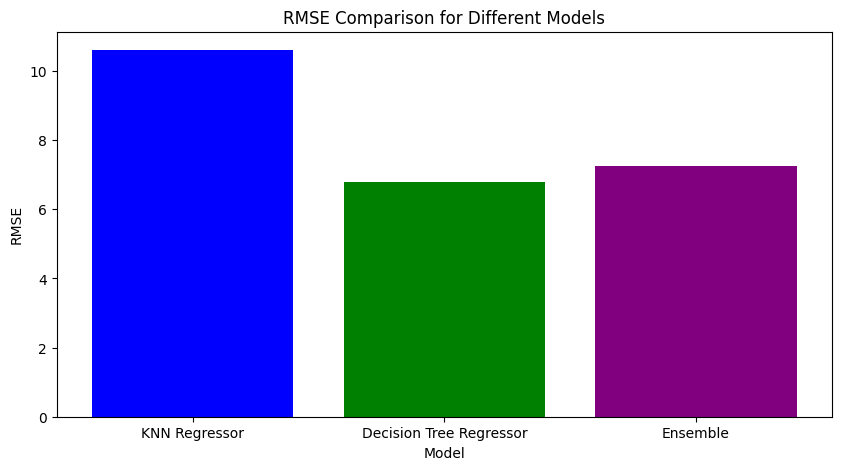

In [162]:
# Plotting the results
models = ['KNN Regressor', 'Decision Tree Regressor', 'Ensemble']
rmse_values = [knn_rmse, dt_rmse, ensemble_rmse]

plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color=['blue', 'green', 'purple'])
plt.title('RMSE Comparison for Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()